# Introduction

When it comes to making money in the stock market, there are a myriad of different ways to make a profit.  We can cite some of the most common trading strategies and investment methods, each with its own specific characteristics and risks: Day Trading, Swing Trading, Long Term Investing, Pairs Trading etc.

Pairs trading is a form of mean reversion that has the distinct advantage of always being hedged against market movements. This is generally a high alpha strategy when supported by rigorous statistics. The strategy is based on mathematical analysis.



 The principle is as follows. Let's say you own a pair of securities X and Y that have an underlying economic connection. The goal will be to create a model that represents the relationship between the two assets in a way that anticipates future price movements.


In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

# Stationarity/Non-Stationarity

Many statistical tests require the data being tested to be stationary.  Using certain statistics on a non-stationary data set can lead to erroneous results


  Consider two series: A and B. Series A will generate a stationary time series with fixed parameters, while B will change over time.

  We will create a function that creates a z-score for the probability density function.  The probability density for a Gaussian distribution is:

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
$$


$\mu$ is the mean and $\sigma$ is the standard deviation. The square of the standard deviation,
$\sigma^2$, is the variance. The empircal rule dictates that 66% of the data should be somewhere between $x+\sigma$ and $x-\sigma$,which implies that the function numpy.random.normal is more likely to return samples lying close to the mean, rather than those far away.

In [ ]:
def generate_data(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

From there, we created two plots presenting a stationary (with fixed parameters) and non-stationary time series (parameters depend on time more precisely, the average of the series evolves over time).

<ipython-input-3-deeea89d1cb2>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  A = pd.Series(index=range(T))
<ipython-input-3-deeea89d1cb2>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  B = pd.Series(index=range(T))


Text(0.5, 1.0, 'Non-Stationary')

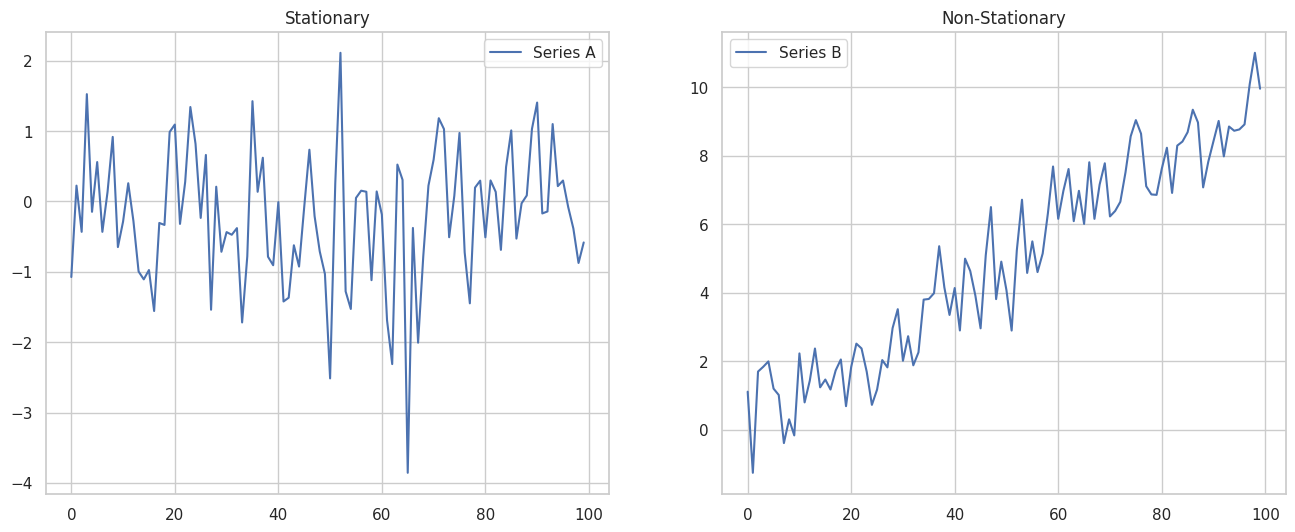

In [ ]:
params = (0, 1)
T = 100

A = pd.Series(index=range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_data(params)

T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    params = (t * 0.1, 1)
    B[t] = generate_data(params)

fig, (ax1, ax2) = plt.subplots(nrows =1, ncols =2, figsize=(16,6))

ax1.plot(A)
ax2.plot(B)
ax1.legend(['Series A'])
ax2.legend(['Series B'])
ax1.set_title('Stationary')
ax2.set_title('Non-Stationary')

In our example, let's take an average over our non-stationary $B$.

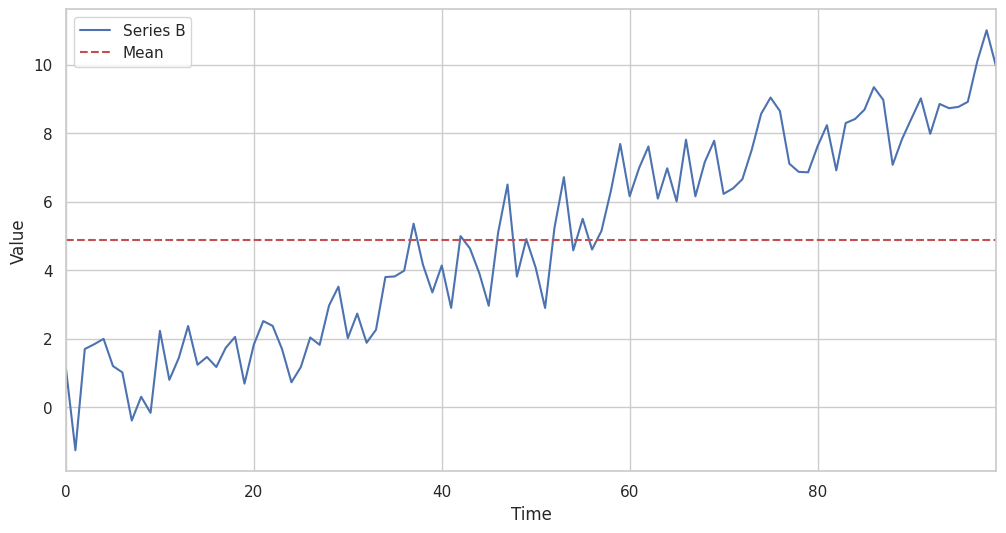

In [ ]:
mean = np.mean(B)

plt.figure(figsize=(12,6))
plt.plot(B)
plt.hlines(mean, 0, len(B), linestyles='dashed', colors = 'r')
plt.xlabel('Time')
plt.xlim([0, 99])
plt.ylabel('Value')
plt.legend(['Series B', 'Mean'])

The calculated average only shows us the average of all data points, but will not be useful for any prediction of the future state.  This makes no sense in relation to any specific time, because it is a collection of different states at different times mixed together.

# Augmented Dickey Fuller

In order to test for stationarity, we need to test for something called a unit root.  Autoregressive unit root tests are based on the following hypothesis test:

\begin{aligned}
H_{0} & : \phi =\ 1\ \implies y_{t} \sim I(0) \ | \ (unit \ root) \\
H_{1} & : |\phi| <\ 1\ \implies y_{t} \sim I(0) \ | \ (stationary)  \\
\end{aligned}

It's referred to as a unit root tet because under the null hypothesis, the autoregressive polynominal of $\scr{z}_{t},\ \phi (\scr{z})=\ (1-\phi \scr{z}) \ = 0$ has a root equal to unity.
$y_t$  is trend stationary under the null hypothesis. If $y_t$ is then first differenced, it becomes:
\begin{aligned}
  \Delta y_{t} & = \delta\ + \Delta\scr{z}_{t} \\
  \Delta \scr_{z} & = \phi\Delta\scr{z}_{t-1}\ +\ \varepsilon_{t}\ -\ \varepsilon_{t-1} \\ \\
\end{aligned}
The test statistic is
$t_{\phi=1}=\frac{\hat{\phi}-1}{SE(\hat{\phi})}$
$\hat{\phi}$ is the least square estimate and $\operatorname{SE}(\hat{\phi})$ is the usual standard error estimate. The test is a one-sided left tail test. If $\left\{y_t\right\}$ is stationary, then it can be shown that
$$
\sqrt{T}(\hat{\phi}-\phi) \stackrel{\mathrm{d}}{\rightarrow} N\left(0,\left(1-\phi^2\right)\right)
$$
or
$$
\hat{\phi} \stackrel{\mathrm{A}}{\sim} N\left(\phi, \frac{1}{T}\left(1-\phi^2\right)\right)
$$
andit follows that $t_{\phi=1} \stackrel{A}{\sim} N(0,1)$. However, under the null hypothesis of non-stationarity, the above result gives
$$
\hat{\phi} \stackrel{A}{\sim} N(0,1)
$$

The following function will allow us to check for stationarity using the Augmented Dickey Fuller (ADF) test.


H_0 in adfuller is unit root exists (non-stationary)
We must observe significant p-value to convince ourselves that the series is stationary

In [ ]:
def stationarity_test(X, cutoff=0.01):

    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')



In [ ]:
stationarity_test(A)
stationarity_test(B)

p-value = 0.07867872176645935 The series A is likely non-stationary.
p-value = 0.9748320688730472 The series B is likely non-stationary.


As we can see, based on the test statistic (which correspnds with a specific p-value) for time series A, we can fail to reject the null hypothesis. As such, Series A is likely to be stationary. On the other hand, Series B is rejected by the hypothesis test, so this time series is likely to be non-stationary


# Cointegration

The correlations between financial quantities are notoriously unstable. Nevertheless, correlations are regularly used in almost all multivariate financial problems. An alternative statistical measure to correlation is cointegration. This is probably a more robust measure of linkage between two financial quantities, but as yet there is little derviaties theory based on this concept.

Two stocks may be perfectly correlated over short timescales, yet diverge in the long run, with one growing and the other decaying. Conversely, two stocks may follow each other, never being more than a certain distance apart, but with any correlation, positive negative or varying. If we are delta hedging, then maybe the short timescale orrelation matters, but not if we are holding stocks for a long time in an unhedged portfolio.

We've constructed an example of two cointegrated series. We'll plot the difference between the two now so we can see how this looks.


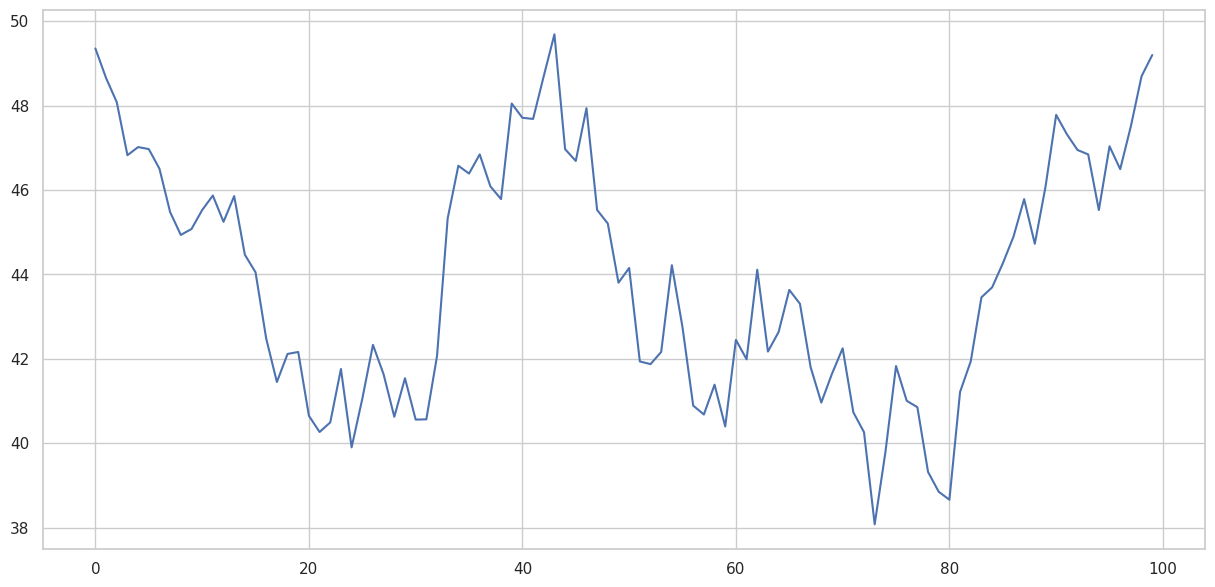

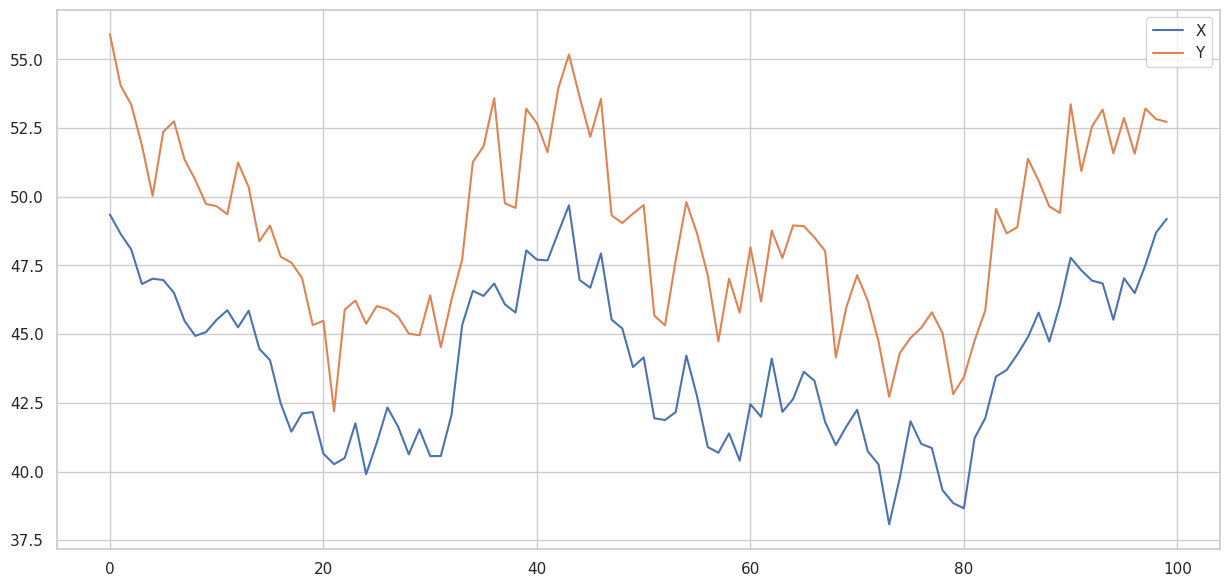

In [ ]:
Xreturns = np.random.normal(0, 1, 100)

# sum up and shift the prices up

X = pd.Series(np.cumsum(
    Xreturns), name='X') + 50
X.plot(figsize=(15,7))

noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'

pd.concat([X, Y], axis=1).plot(figsize=(15, 7))

plt.show()

Let 's plot also mean and spread

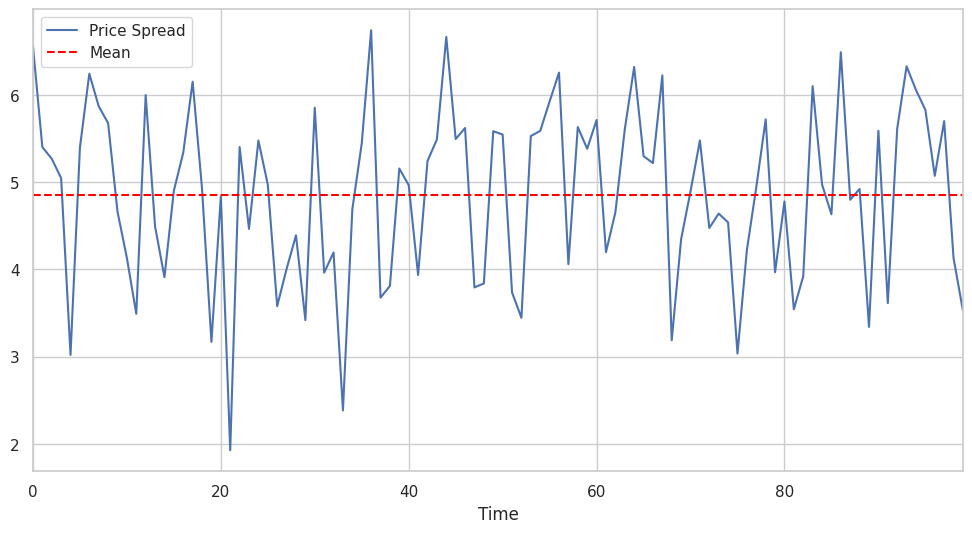

In [ ]:
plt.figure(figsize=(12,6))
(Y - X).plot()
plt.axhline((Y - X).mean(), color='red', linestyle='--')
plt.xlabel('Time')
plt.xlim(0,99)
plt.legend(['Price Spread', 'Mean']);

# Testing for Cointegration

Testing for Cointegration
The steps in the cointegration test procdure:
1. Test for a unit root in each component series $\boldsymbol{y}_{\boldsymbol{t}}$ individually, using the univariate unit root tests, say ADF, PP test.
2. If the unit root cannot be rejected, then the next step is to test cointegration among the components, i.e., to test whether $\alpha Y_t$ is I( 0 ).

If we find that the time series as a unit root, then we move on to the cointegration process. There are three main methods for testing for cointegration: Johansen, Engle-Granger, and Phillips-Ouliaris. We will primarily use the Engle-Granger test.

Let's consider the regression model for $y_t$ :
$$
y_{1 t}=\delta D_t+\phi_{1 t} y_{2 t}+\phi_{m-1} y_{m t}+\varepsilon_t
$$
$D_t$ is the deterministic term. From there, we can test whether $\varepsilon_t$ is $I(1)$ or $I(0)$. The hypothesis test is as follows:
$$
\begin{aligned}
& H_0: \varepsilon_t \sim I(1) \Longrightarrow y_t \text { (no cointegration) } \\
& H_1: \varepsilon_t \sim I(0) \Longrightarrow y_t \text { (cointegration) }
\end{aligned}
$$
$y_t$ is cointegrated with a normalized cointegration vector $\alpha=\left(1, \phi_1, \ldots, \phi_{m-1}\right)$.
We also use residuals $\varepsilon_t$ for unit root test.
$$
\begin{aligned}
& H_0: \lambda=0 \text { (Unit Root) } \\
& H_1: \lambda<1 \text { (Stationary) }
\end{aligned}
$$

This hypothesis test is for the model:
$$
\Delta \varepsilon_t=\lambda \varepsilon_{t-1}+\sum_{j=1}^{p-1} \varphi \Delta \varepsilon_{t-j}+\alpha_t
$$

The test statistic for the following equation:
$$
t_\lambda=\frac{\hat{\lambda}}{s_{\hat{\lambda}}}
$$

Now that we have understood what it means for two time series to be cointegrated, we can test for it and measure it using python:

In [ ]:
score, pvalue, _ = coint(X,Y)
print(pvalue)

1.8195829221378903e-12


We have Low pvalue. That means high cointegration.


# Correlation vs. Cointegration

Correlation and cointegration, while theoretically similiar, are anything but similiar. To demonstrate this, we can look at examples of two time series that are correlated, but not cointegrated.

A simple example is two series that just diverge.


(0.0, 99.0)

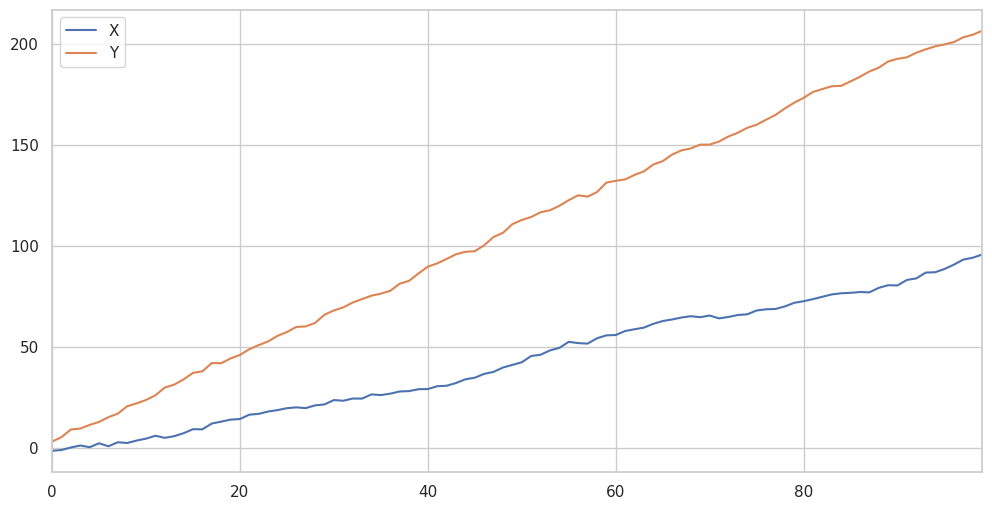

In [ ]:
X_returns = np.random.normal(1, 1, 100)
Y_returns = np.random.normal(2, 1, 100)

X_diverging = pd.Series(np.cumsum(X_returns), name='X')
Y_diverging = pd.Series(np.cumsum(Y_returns), name='Y')


pd.concat([X_diverging, Y_diverging], axis=1).plot(figsize=(12,6));
plt.xlim(0, 99)

In [ ]:
print('Correlation: ' + str(X_diverging.corr(Y_diverging)))
score, pvalue, _ = coint(X_diverging,Y_diverging)
print('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.9961496078427771
Cointegration test p-value: 0.45585324020468354


As we can see, there is a very strong (nearly perfect) correlation between series X and Y. However, our p-value for the cointegration test yields a result of 0.7092, which means there is no cointegration between time series X and Y.

Another example of this case is a normally distributed series and a sqaure wave.

Correlation: -0.0029793940071140353
Cointegration test p-value: 0.0


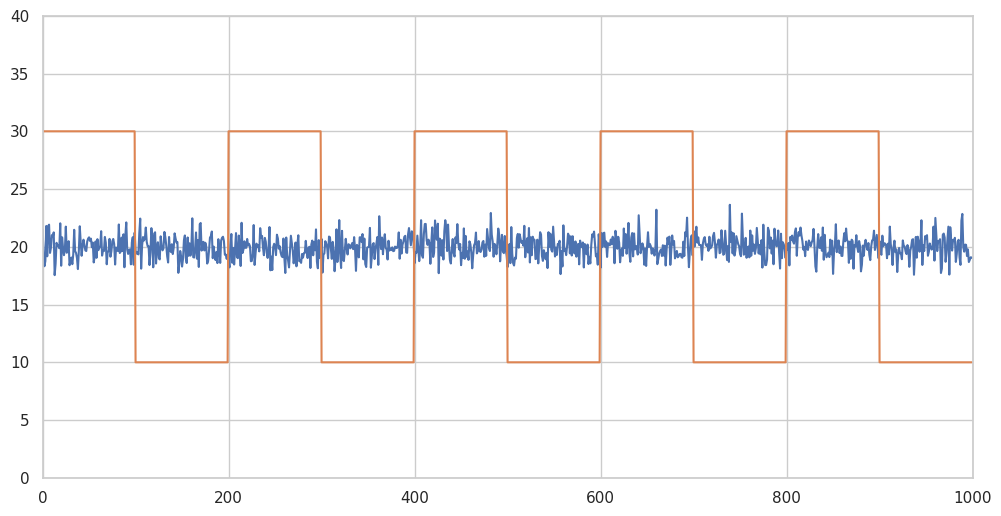

In [ ]:
Y2 = pd.Series(np.random.normal(0, 1, 1000), name='Y2') + 20
Y3 = Y2.copy()

# Y2 = Y2 + 10
Y3[0:100] = 30
Y3[100:200] = 10
Y3[200:300] = 30
Y3[300:400] = 10
Y3[400:500] = 30
Y3[500:600] = 10
Y3[600:700] = 30
Y3[700:800] = 10
Y3[800:900] = 30
Y3[900:1000] = 10


plt.figure(figsize=(12,6))
Y2.plot()
Y3.plot()
plt.ylim([0, 40])
plt.xlim([0, 1000]);

# correlation is nearly zero
print( 'Correlation: ' + str(Y2.corr(Y3)))
score, pvalue, _ = coint(Y2,Y3)
print( 'Cointegration test p-value: ' + str(pvalue))

Although the correlation is incredibly low, the p-value shows that these time series are cointegrated.

In [ ]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
yf.pdr_override()

# Pairs selection

We will now define a function that makes it easier to find cointegrated security pairs using the concepts we have already covered.

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2020, 1, 1)

tickers = ['AAPL', 'ADBE', 'ORCL', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM', 'SPY']


df = pdr.get_data_yahoo(tickers, start, end)['Close']
df.tail()

[*********************100%%**********************]  11 of 11 completed


,AAPL,ADBE,AMD,EBAY,HPQ,IBM,JNPR,MSFT,ORCL,QCOM,SPY
Date,,,,,,,,,,,
2019-12-24,71.067497,329.640015,46.540001,36.209999,20.590000,129.043976,24.290001,157.380005,53.439999,88.769997,321.230011
2019-12-26,72.477501,331.200012,46.630001,36.250000,20.690001,128.977051,24.490000,158.669998,53.570000,88.400002,322.940002
2019-12-27,72.449997,330.790009,46.180000,36.070000,20.530001,129.321228,24.410000,158.960007,53.459999,88.800003,322.859985
2019-12-30,72.879997,328.339996,45.520000,35.799999,20.490000,126.969406,24.500000,157.589996,52.700001,88.430000,321.079987
2019-12-31,73.412498,329.809998,45.860001,36.110001,20.549999,128.145309,24.629999,157.699997,52.980000,88.230003,321.859985


from matplotlib import pyplot as plt
_df_0['AAPL'].plot(kind='hist', bins=20, title='AAPL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ADBE'].plot(kind='hist', bins=20, title='ADBE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AMD'].plot(kind='hist', bins=20, title='AMD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['EBAY'].plot(kind='hist', bins=20, title='EBAY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='AAPL', y='ADBE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ADBE', y='AMD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AMD', y='EBAY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='EBAY', y='HPQ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['AAPL'].plot(kind='line', figsize=(8, 4), title='AAPL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['ADBE'].plot(kind='line', figsize=(8, 4), title='ADBE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AMD'].plot(kind='line', figsize=(8, 4), title='AMD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['EBAY'].plot(kind='line', figsize=(8, 4), title='EBAY')
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
df.isnull().sum()

AAPL    0
ADBE    0
AMD     0
EBAY    0
HPQ     0
IBM     0
JNPR    0
MSFT    0
ORCL    0
QCOM    0
SPY     0
dtype: int64

In [35]:
df.isna().sum()

AAPL    0
ADBE    0
AMD     0
EBAY    0
HPQ     0
IBM     0
JNPR    0
MSFT    0
ORCL    0
QCOM    0
SPY     0
dtype: int64

<Axes: xlabel='Date'>

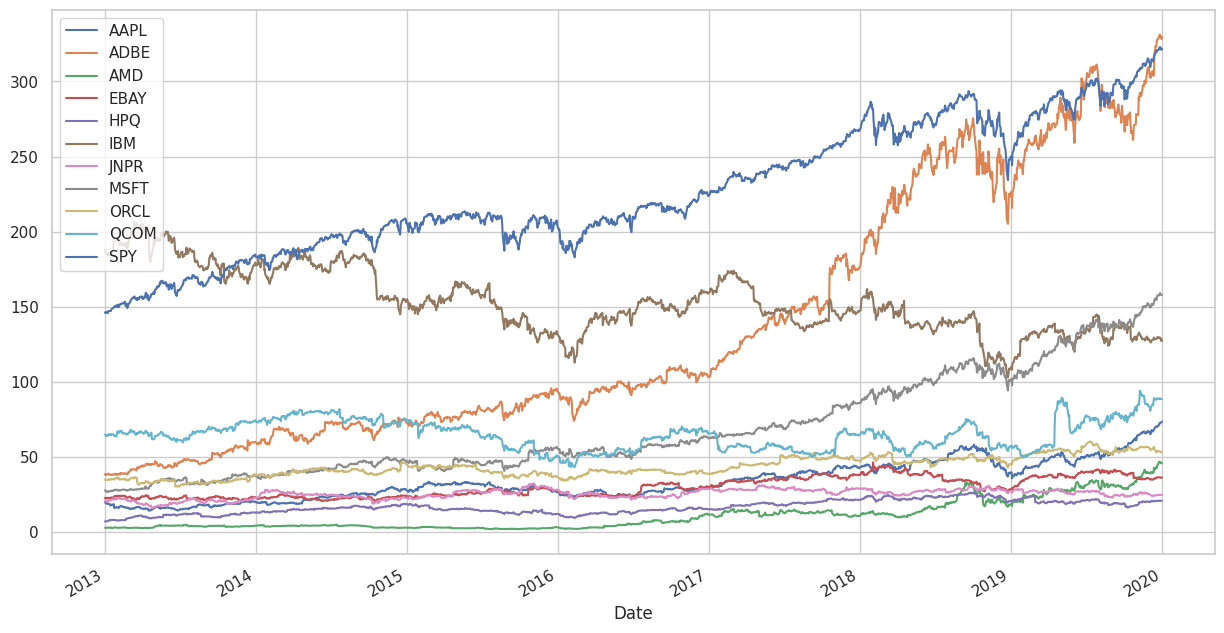

In [33]:
df.plot(figsize=(15,8))

We will use Heatmap to show the p-values ​​of the cointegration test between each pair of *stocks*

[('IBM', 'ORCL'), ('JNPR', 'QCOM'), ('ORCL', 'SPY')]


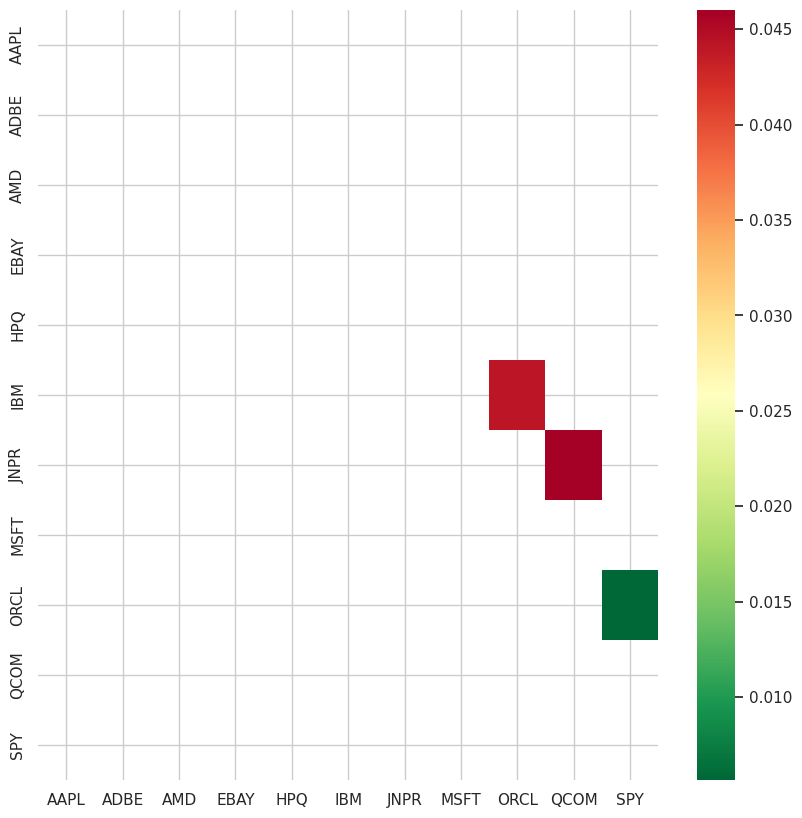

In [ ]:
scores, pvalues, pairs = find_cointegrated_pairs(df)
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=df.columns, yticklabels=df.columns, cmap='RdYlGn_r'
                , mask = (pvalues >= 0.05)
                )
print(pairs)

*Our* algorithm listed two pairs that are cointegrated: IBM/ORCL, and JNPR/MSFT. We can analyze their price patterns to make sure there is nothing weird going on.


In [36]:
S1 = df['IBM']
S2 = df['ORCL']

score, pvalue, _ = coint(S1, S2)
pvalue

0.04426810239758608

In [ ]:
S1 = df['ORCL']
S2 = df['SPY']
score, pvalue, _ = coint(S1, S2)
pvalue

0.005655936067844194


# Calculating the Spread

Now we can plot the spread of the two time series. In order to actually calculate the spread, we use a linear regression to get the coefficient for the linear combination to construct between our two securities, as mentioned with the Engle-Granger method before.


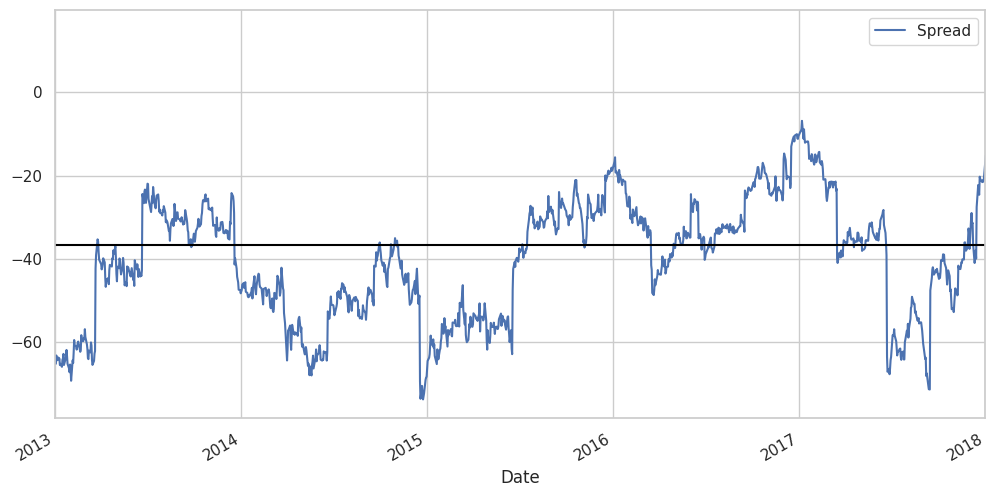

In [ ]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['ORCL']
b = results.params['ORCL']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Spread']);

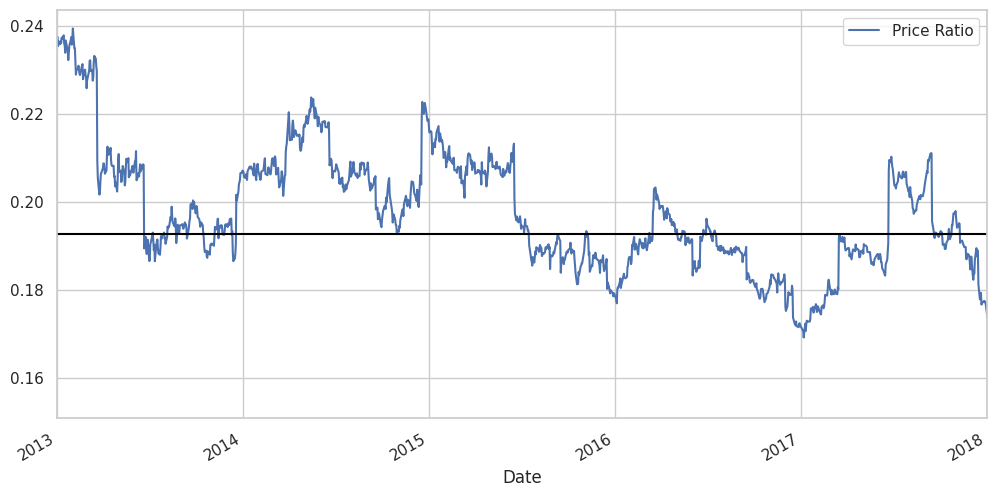

In [ ]:
ratio = S1/S2
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
plt.xlim('2013-01-01', '2018-01-01')
plt.legend(['Price Ratio']);



Regardless of whether or not we use the spread approach or the ratio approach, we can see that our first plot pair ADBE/SYMC tends to move around the mean. We now need to standardize this ratio because the absolute ratio might not be the most ideal way of analyzing this trend. For this, we need to use z-scores.

A z-score is the number of standard deviations a datapoint is from the mean. More importantly, the nmber of standard deviations above or below the population mean is from the raw score. The z-score is calculated by the follow:

# Z-score

\begin{aligned}
  \mathcal{z}_{i}=\frac{x_{i}-\bar{x}}{s}
\end{aligned}



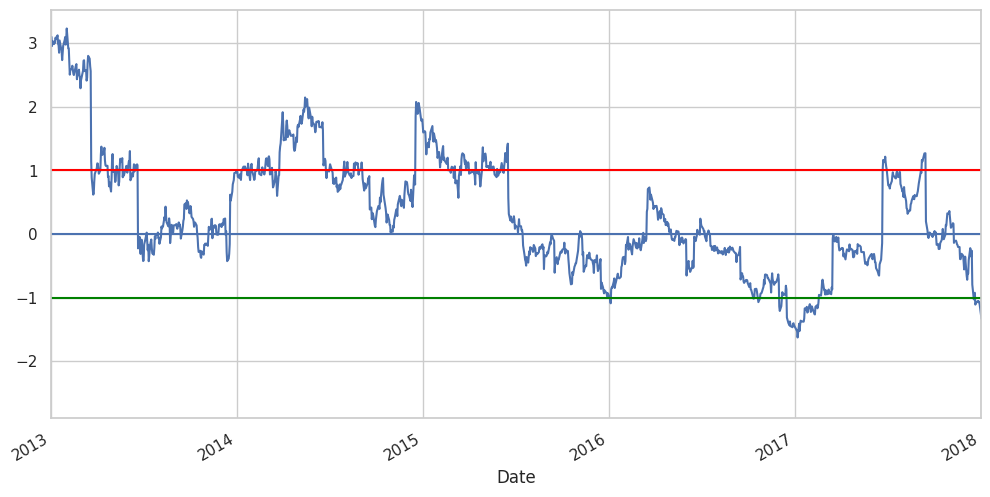

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2013-01-01', '2018-01-01')
plt.show()



By setting two other lines placed at the z-score of 1 and -1, we can clearly see that for the most part, any big divergences from the mean eventually converges back. This is exactly what we want for a pairs trading strategy.


# Trading Signals

For any type of trading strategy, it is always important to clearly define and delineate when we should actually make a trade.  For example, what is the best indicator we need to buy or sell a particular stock?

## Setup rules

We're going to use the ratio time series that we've created to see if it tells us whether to buy or sell a particular moment in time. We'll start off by creating a prediction variable
. If the ratio is positive, it will signal a "buy," otherwise, it will signal a sell. The prediction model is as follows:

\begin{aligned}
Y_{t} = sign(Ratio_{t+1}-Ratio_{t})
\end{aligned}

When training and testing a model we only used a time series of 252 points (i.e. the number of trading days in a year).  Before training and splitting the data, we will add more data points in each time series.

In [ ]:
ratios = df['IBM'] / df['ORCL']
print(len(ratios) * .70 )

1233.3999999999999


In [ ]:
train = ratios[:1233]
test = ratios[1233:]

In [ ]:
df.iloc[1233]

AAPL     43.740002
ADBE    182.899994
AMD      11.370000
EBAY     35.939999
HPQ      21.340000
IBM     145.095596
JNPR     27.010000
MSFT     83.110001
ORCL     48.580002
QCOM     68.129997
SPY     259.760010
Name: 2017-11-22 00:00:00, dtype: float64

# Feature Engineering

We need to find out what features are actually important in determining the direction of the ratio moves. Knowing that the ratios always eventually revert back to the mean, maybe the moving averages and metrics related to the mean will be important.

Let's try using these features:

* 60 day Moving Average of Ratio
* 5 day Moving Average of Ratio
* 60 day Standard Deviation
* z score


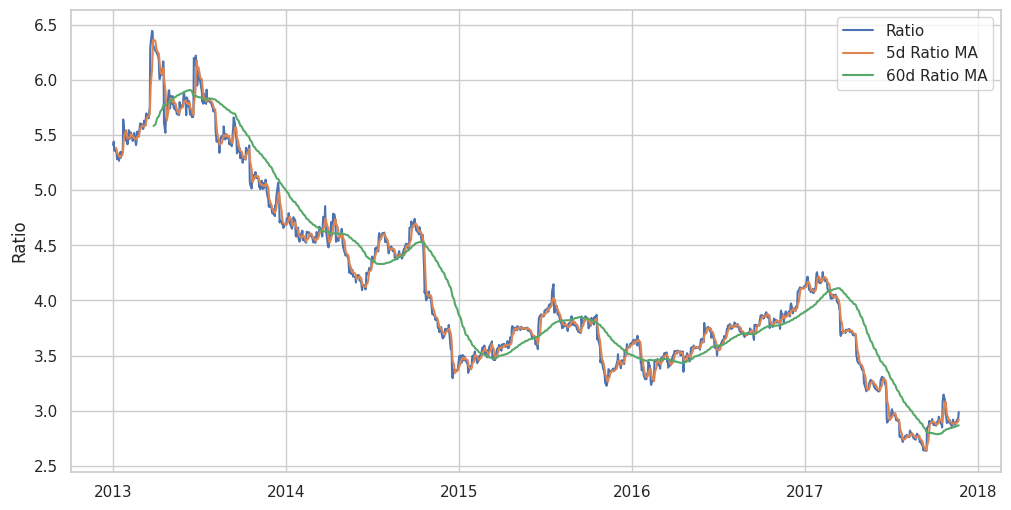

In [37]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

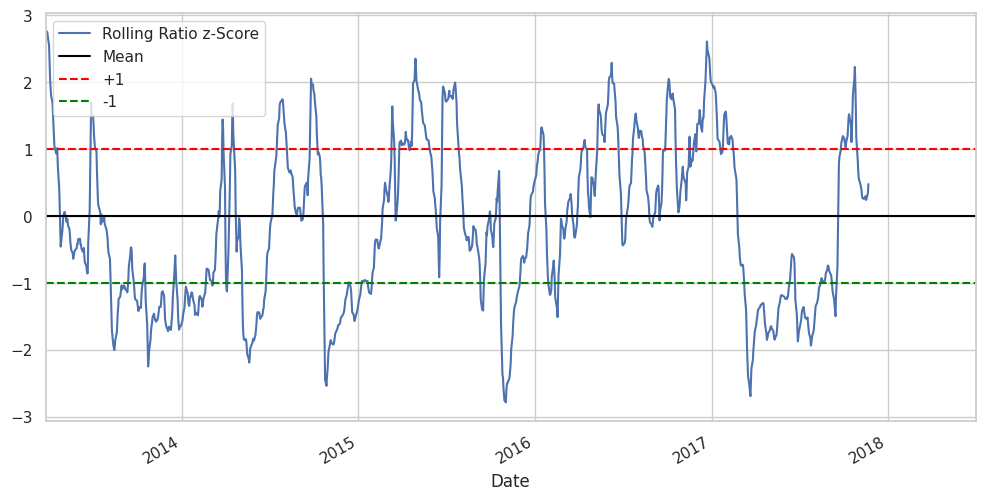

In [38]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.xlim('2013-03-25', '2018-07-01')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

# Creating a Model

A standard normal distribution has a mean of 0 and a standard deviation 1. Looking at the plot, it's pretty clear that if the time series moves 1 standard deviation beyond the mean, it tends to revert back towards the mean. Using these models, we can create the following trading signals:

    Buy(1) whenever the z-score is below -1, meaning we expect the ratio to increase.
    Sell(-1) whenever the z-score is above 1, meaning we expect the ratio to decrease.

## Training Optimizing

We can use our model on actual data


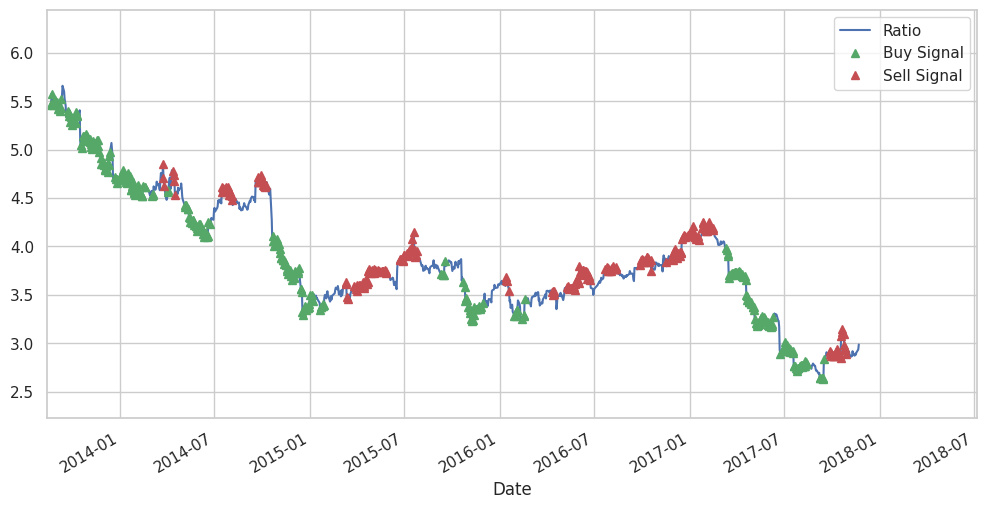

In [39]:
plt.figure(figsize=(12,6))

train[160:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.xlim('2013-08-15','2018-07-07')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

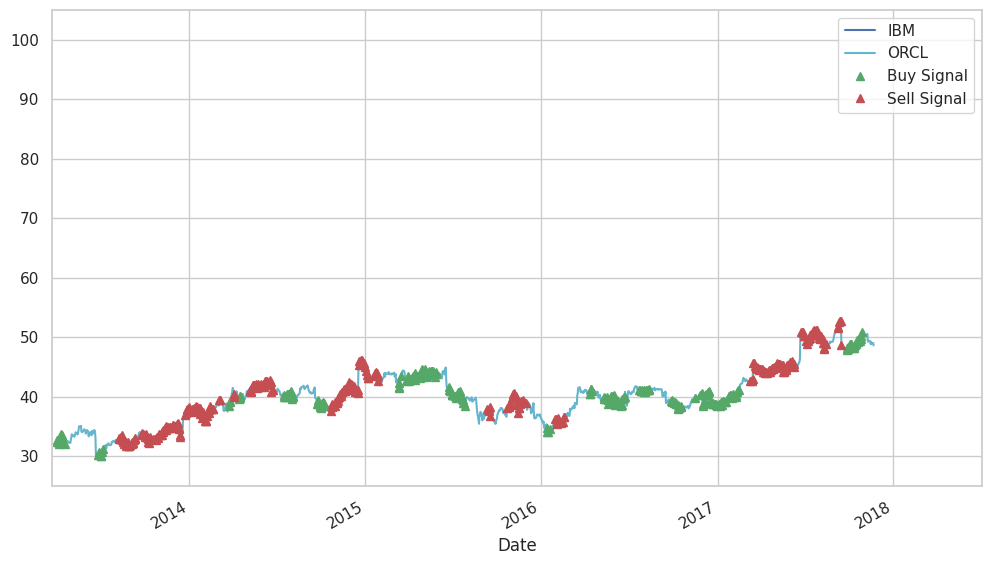

In [40]:
plt.figure(figsize=(12,7))
S1 = df['IBM'].iloc[:1233]
S2 = df['ORCL'].iloc[:1233]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.ylim(25, 105)
plt.xlim('2013-03-22', '2018-07-04')

plt.legend(['IBM', 'ORCL', 'Buy Signal', 'Sell Signal'])
plt.show()

Now we can clearly see when we should buy or sell on the respective stocks.

In [ ]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):

    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0

    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std

    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))


    return money